In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\Downloads\titanic.csv")  
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

C:\Users\Sandra\AppData\Local\Temp\ipykernel_4072\2256237120.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Sandra\AppData\Local\Temp\ipykernel_4072\2256237120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [5]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
features = ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5
)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)


Model Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.84      0.72      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



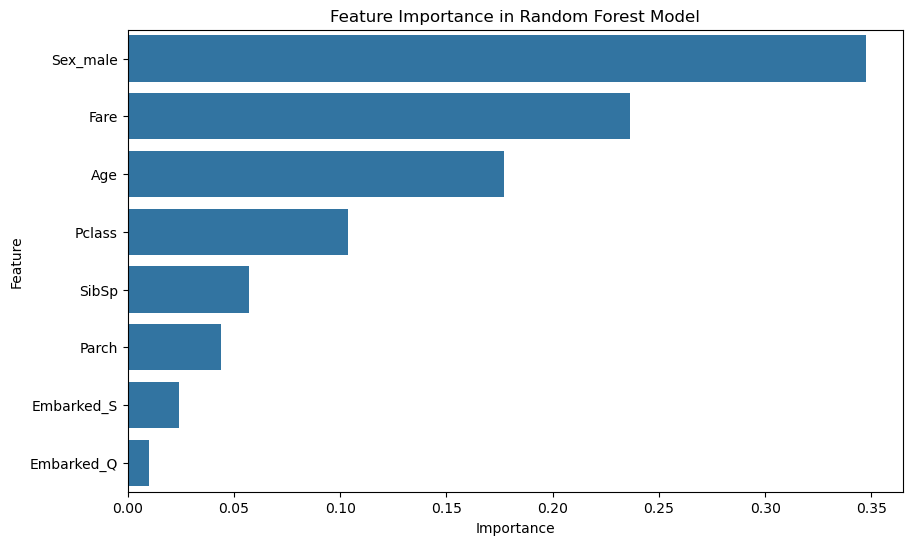

In [10]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.show()



In [ ]:
# Survival rates by key categories
print("\nSurvival Rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean())

print("\nSurvival Rate by Sex_male:")
print(df.groupby('Sex_male')['Survived'].mean())

df['AgeGroup'] = pd.cut(df['Age'], 
                        bins=[0, 12, 18, 30, 50, 100], 
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
print("\nSurvival Rate by Age Group:")
print(df.groupby('AgeGroup')['Survived'].mean())




Survival Rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rate by Sex_male:
Sex_male
False    0.742038
True     0.188908
Name: Survived, dtype: float64

Survival Rate by Age Group:
AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.331096
Adult          0.423237
Senior         0.343750
Name: Survived, dtype: float64

Testing Predictions:

Passenger 1 Prediction:
Class: 1, Sex: female, Age: 25
Fare: 100.0, Embarked: C
Survived: Yes
Survival Probability: 98.59%

Passenger 2 Prediction:
Class: 3, Sex: male, Age: 30
Fare: 7.25, Embarked: S
Survived: Yes
Survival Probability: 72.90%


C:\Users\Sandra\AppData\Local\Temp\ipykernel_4072\3013343095.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['Survived'].mean())


In [12]:
# Survival rates by key categories
print("\nSurvival Rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean())

print("\nSurvival Rate by Sex_male:")
print(df.groupby('Sex_male')['Survived'].mean())

df['AgeGroup'] = pd.cut(df['Age'], 
                        bins=[0, 12, 18, 30, 50, 100], 
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
print("\nSurvival Rate by Age Group:")
print(df.groupby('AgeGroup')['Survived'].mean())

# Testing Predictions
print("\nTesting Predictions:")

test_passengers = [
    {
        'Pclass': 1,
        'Age': 25,
        'Fare': 100.0,
        'SibSp': 0,
        'Parch': 0,
        'Sex': 'female',
        'Embarked': 'C'
    },
    {
        'Pclass': 3,
        'Age': 30,
        'Fare': 7.25,
        'SibSp': 0,
        'Parch': 0,
        'Sex': 'male',
        'Embarked': 'S'
    }
]

for i, test_passenger in enumerate(test_passengers, 1):
    df_input = pd.DataFrame([test_passenger])
    df_input = pd.get_dummies(df_input, columns=['Sex', 'Embarked'], drop_first=True)

    for col in X.columns:
        if col not in df_input.columns:
            df_input[col] = 0

    X_input = df_input[X.columns]
    X_input_scaled = scaler.transform(X_input)
    prediction = model.predict(X_input_scaled)
    probability = model.predict_proba(X_input_scaled)[0][1]

    print(f"\nPassenger {i} Prediction:")
    print(f"Class: {test_passenger['Pclass']}, Sex: {test_passenger['Sex']}, Age: {test_passenger['Age']}")
    print(f"Fare: {test_passenger['Fare']}, Embarked: {test_passenger['Embarked']}")
    print(f"Survived: {'Yes' if prediction[0] else 'No'}")
    print(f"Survival Probability: {probability:.2%}")


Survival Rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rate by Sex_male:
Sex_male
False    0.742038
True     0.188908
Name: Survived, dtype: float64

Survival Rate by Age Group:
AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.331096
Adult          0.423237
Senior         0.343750
Name: Survived, dtype: float64

Testing Predictions:

Passenger 1 Prediction:
Class: 1, Sex: female, Age: 25
Fare: 100.0, Embarked: C
Survived: Yes
Survival Probability: 98.59%

Passenger 2 Prediction:
Class: 3, Sex: male, Age: 30
Fare: 7.25, Embarked: S
Survived: Yes
Survival Probability: 72.90%


C:\Users\Sandra\AppData\Local\Temp\ipykernel_4072\3013343095.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['Survived'].mean())
